Задание:
####Классификация по столбцу
* Race ethnicity (group C – класс 0, 
остальные уровни – класс 1)

In [ ]:
import pandas
import numpy as np
import io
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = pandas.read_csv('/StudentsPerformance.csv')

> Читаем данныне, получаем базовую информацию









In [ ]:
data.shape
data.info()
data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


> Выбираем необходимы столбцы, вводим дамми переменные для не вещественных 
значений. 
> Присваеваем значение `0` для группы `C`, а для отсальных значение `1`

In [ ]:
data_sel = data.loc[:, data.columns.isin(['gender','race/ethnicity','math score','parental level of education','reading score','writing score'])]
data_sel = data_sel.dropna()
data_sel['gender'] = np.where(data_sel['gender'] == 'male', 1, 0)
data_sel['race/ethnicity'] = np.where(data_sel['race/ethnicity'] == 'group C', 1, 0)

data_sel['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

> `Label encoder` только ручками(**1 вариант кодировки переменных**)





In [ ]:
data_sel['parental level of education'] = np.where(data_sel['parental level of education'] == "bachelor's degree", 1, data_sel['parental level of education'])
data_sel['parental level of education'] = np.where(data_sel['parental level of education'] == "master's degree", 2, data_sel['parental level of education'])
data_sel['parental level of education'] = np.where(data_sel['parental level of education'] == "some college", 3, data_sel['parental level of education'])
data_sel['parental level of education'] = np.where(data_sel['parental level of education'] == "high school", 4, data_sel['parental level of education'])
data_sel['parental level of education'] = np.where(data_sel['parental level of education'] == "some high school", 5, data_sel['parental level of education'])
data_sel['parental level of education'] = np.where(data_sel['parental level of education'] == "associate's degree", 6, data_sel['parental level of education'])
data_sel.head

<bound method NDFrame.head of      gender  race/ethnicity parental level of education  math score  \
0         0               0                           1          72   
1         0               1                           3          69   
2         0               0                           2          90   
3         1               0                           6          47   
4         1               1                           3          76   
..      ...             ...                         ...         ...   
995       0               0                           2          88   
996       1               1                           4          62   
997       0               1                           4          59   
998       0               0                           3          68   
999       0               0                           3          77   

     reading score  writing score  
0               72             74  
1               90             88  
2        

>Разбиваем данные на обучающую и тестовую выборки

In [ ]:
import pandas as pd
import pathlib
from pathlib import Path

target = data_sel.loc[:, data_sel.columns.isin(['race/ethnicity'])]

X = data_sel.loc[:, data_sel.columns.isin(['gender','math score','reading score','writing score',"parental level of education"])]
#"associate's degree","bachelor's degree","high school", "master's degree", "some college", "some high school"
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.35,random_state = 0)



Запускаем логистическую регрессию


In [ ]:
clf2 = LogisticRegression(penalty = 'l2',random_state = 0, solver = 'liblinear', max_iter = 30, multi_class ='auto')
clf2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=30, random_state=0, solver='liblinear')

In [ ]:
y_pred = clf2.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

> Метрика `precision`,`f1`,`accuracy`, `recall` на тестовых выборках для классификатора `LogisticRegression`:

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
Score = clf2.score(X_test, y_test,sample_weight = None)
print(Score)
print("accuracy:"+str(np.average(cross_val_score(clf2, X_test, y_test, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(clf2, X_test, y_test,  scoring='f1'))))
print("precision:"+str(np.average(cross_val_score(clf2, X_test, y_test,  scoring='precision'))))
print("recall:"+str(np.average(cross_val_score(clf2, X_test, y_test,  scoring='recall'))))

0.6742857142857143
accuracy:0.6742857142857142
f1:0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

precision:0.0
recall:0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

> Классификатор случайный лес. Вывод метрик.

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 241 to 684
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       650 non-null    int64 
 1   parental level of education  650 non-null    object
 2   math score                   650 non-null    int64 
 3   reading score                650 non-null    int64 
 4   writing score                650 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 30.5+ KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
# Classifaer Random Forest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

n_estimators = [100,300,400]
max_fetures = ['log2','sqrt']
max_depth = list(range(1,15))
#bootstrap = [True,False]

param_grid = { 'n_estimators': n_estimators,  
              'max_depth': max_depth,'criterion': ['gini','entropy'], 'n_jobs': [-1]}
            

rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv =5,refit= True)
rfc.fit(X_train,y_train)

rfc_3 = rfc.best_estimator_
rfc.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 400, 'n_jobs': -1}

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report
pred = rfc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix
report = classification_report(y_test, rfc.predict(X_test), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.68      0.99      0.81       237
     Churned       0.50      0.02      0.03       113

    accuracy                           0.68       350
   macro avg       0.59      0.50      0.42       350
weighted avg       0.62      0.68      0.56       350



**Лучшими параметрами оказались 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 300, 'n_jobs': -1**
> Оптимальное число деревьев на данный момент 100.

> Прогнали по значениям в окрестности 100.


In [ ]:
param_grid = { 'n_estimators' : list(range(275,325)),  
              'max_depth': [5],'criterion': ['entropy'], 'n_jobs': [-1]}
            

rfc20 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv =3,refit= True)

rfc20.fit(X_train,y_train)


rfc20.best_params_

Оптимальное число деревьев `308`

>Визуализируем важность каждого параметра в класификации

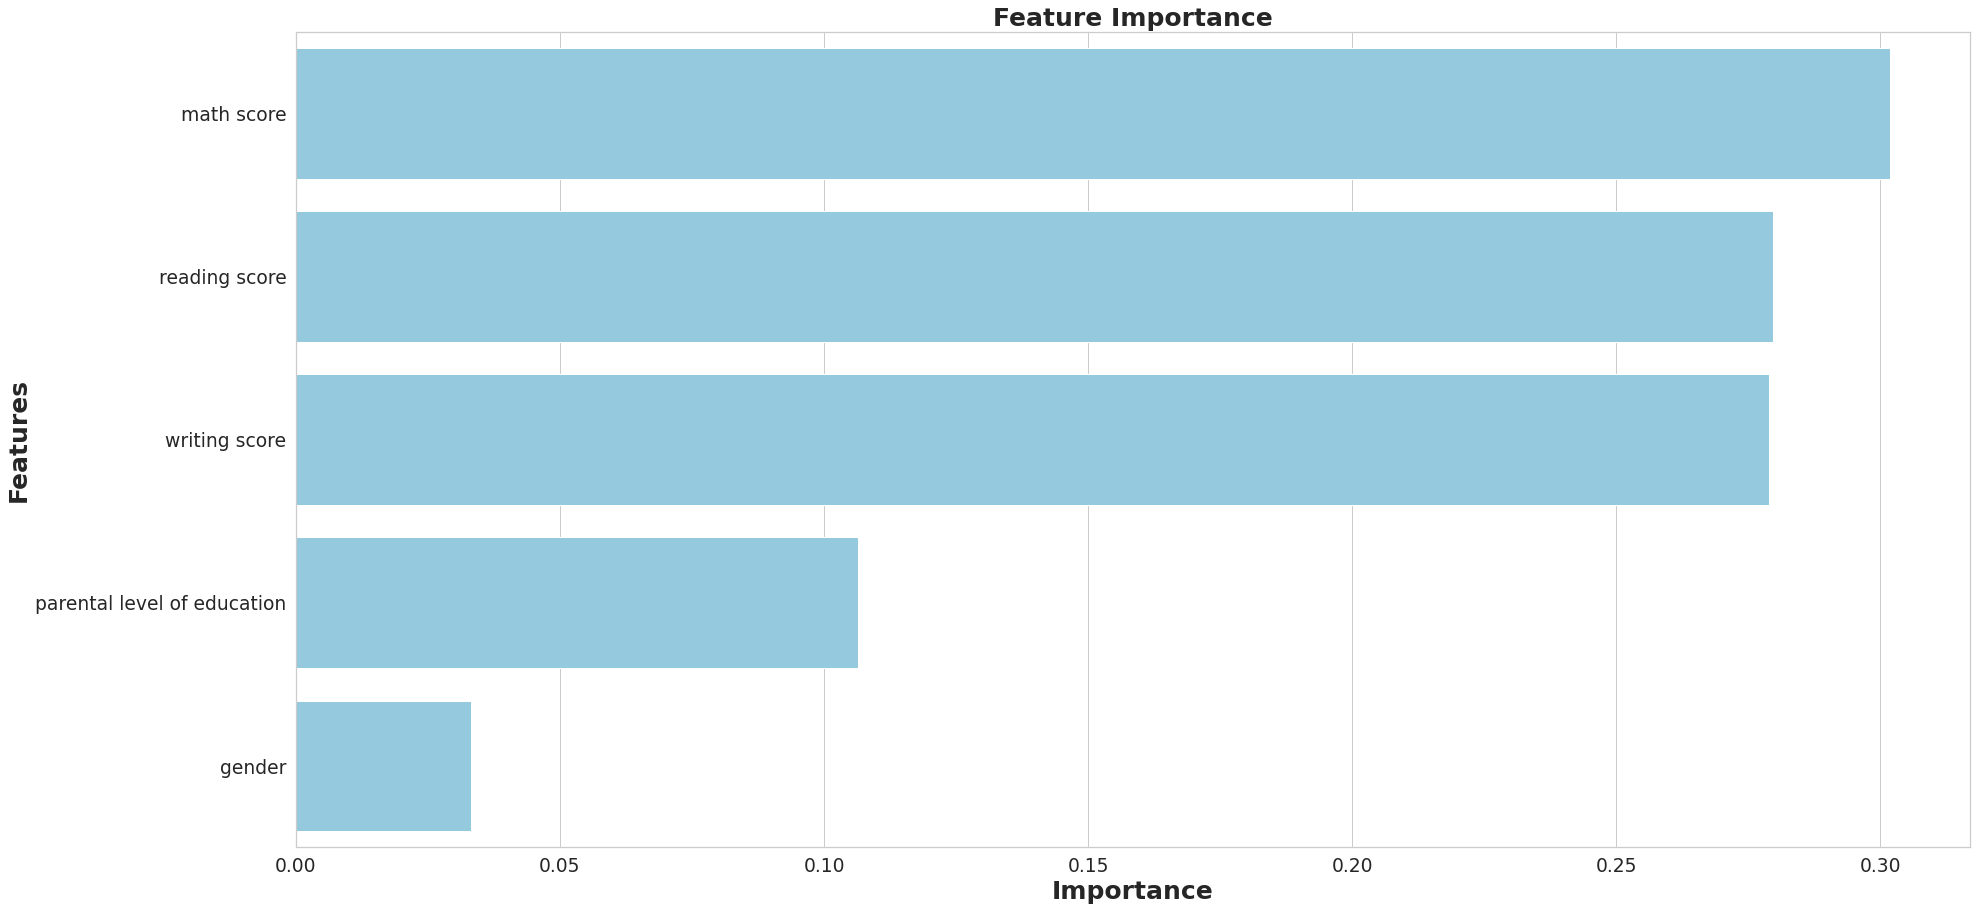

None

,Features,Entropy-Importance
0,math score,0.301899
1,reading score,0.279666
2,writing score,0.278979
3,parental level of education,0.106385
4,gender,0.033070


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
feats = { }
for feature, importance in zip(X.columns, rfc.best_estimator_.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Entropy-Importance'})
importances = importances.sort_values(by='Entropy-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Entropy-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [ ]:
print("accuracy:"+str(np.average(cross_val_score(rfc.best_estimator_, X_test, y_test, scoring='accuracy'))))
print("f1:"+str(np.average(cross_val_score(rfc.best_estimator_, X_test, y_test, scoring='f1'))))
print("precision:"+str(np.average(cross_val_score(rfc.best_estimator_, X_test, y_test, scoring='precision'))))
print("recall:"+str(np.average(cross_val_score(rfc.best_estimator_, X_test, y_test, cv = 10,scoring='recall'))))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

accuracy:0.657142857142857


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

f1:0.060571428571428575


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

precision:0.24666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

recall:0.01818181818181818


###Вывод: 
Если судить по метрике `Accuracy`, то обе модели показывают примерно одинаковые результаты. Метрики качества показывает плохие результаты(кроме accuracy), возможно это связано с тем, что предсказанные значения `1` хуже определяются тем значение группы `0`.
***

           Metrics                 Accuracy     f1    recall    precision
***          
    Logistic Regression:            0.6742     0.68    0.04        0.71
    Random Forest:                  0.6514    0.06057  0.0272      0.2809
***

